# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

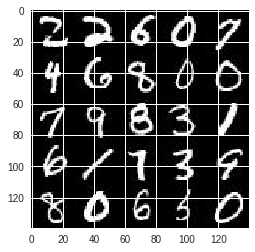

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

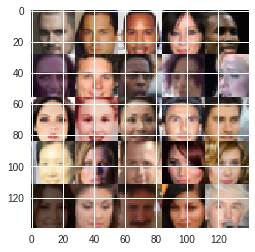

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        alpha = 0.2
        
        h1 = tf.layers.conv2d(images, 64, 5, 2, 'same')
        h1 = tf.maximum(alpha * h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 5, 2, 'same')
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha * h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out

    
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    input_real, input_z, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, img_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 20
    show_every = 200
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={
                        input_real: batch_images, input_z: z_sample, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={
                        input_z: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: z_sample, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images,input_z, img_channels, data_image_mode)
                        
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.1393... Generator Loss: 0.8725
Epoch 1/2... Discriminator Loss: 0.1343... Generator Loss: 2.9483
Epoch 1/2... Discriminator Loss: 0.0143... Generator Loss: 5.0382
Epoch 1/2... Discriminator Loss: 0.0025... Generator Loss: 6.7211
Epoch 1/2... Discriminator Loss: 0.0769... Generator Loss: 3.3252
Epoch 1/2... Discriminator Loss: 0.0312... Generator Loss: 3.8961
Epoch 1/2... Discriminator Loss: 0.4592... Generator Loss: 2.0176
Epoch 1/2... Discriminator Loss: 0.2592... Generator Loss: 3.7633
Epoch 1/2... Discriminator Loss: 0.3615... Generator Loss: 2.0443
Epoch 1/2... Discriminator Loss: 1.0876... Generator Loss: 1.3210


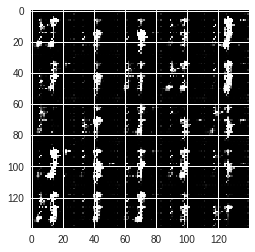

Epoch 1/2... Discriminator Loss: 0.2706... Generator Loss: 2.3871
Epoch 1/2... Discriminator Loss: 0.2636... Generator Loss: 5.3402
Epoch 1/2... Discriminator Loss: 1.0317... Generator Loss: 1.0550
Epoch 1/2... Discriminator Loss: 1.3034... Generator Loss: 0.8446
Epoch 1/2... Discriminator Loss: 0.3961... Generator Loss: 2.6608
Epoch 1/2... Discriminator Loss: 2.3103... Generator Loss: 0.2969
Epoch 1/2... Discriminator Loss: 0.6050... Generator Loss: 4.2133
Epoch 1/2... Discriminator Loss: 0.4182... Generator Loss: 2.9727
Epoch 1/2... Discriminator Loss: 0.6752... Generator Loss: 5.1813
Epoch 1/2... Discriminator Loss: 0.5072... Generator Loss: 3.2495


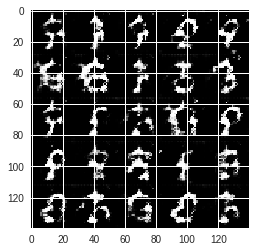

Epoch 1/2... Discriminator Loss: 0.8373... Generator Loss: 0.9008
Epoch 1/2... Discriminator Loss: 0.5921... Generator Loss: 1.7286
Epoch 1/2... Discriminator Loss: 1.5344... Generator Loss: 0.4535
Epoch 1/2... Discriminator Loss: 1.4230... Generator Loss: 0.8692
Epoch 1/2... Discriminator Loss: 0.8152... Generator Loss: 2.3419
Epoch 1/2... Discriminator Loss: 1.1736... Generator Loss: 0.7863
Epoch 1/2... Discriminator Loss: 0.6536... Generator Loss: 1.4314
Epoch 1/2... Discriminator Loss: 0.9856... Generator Loss: 0.8668
Epoch 1/2... Discriminator Loss: 0.6174... Generator Loss: 1.2267
Epoch 1/2... Discriminator Loss: 0.7787... Generator Loss: 2.0380


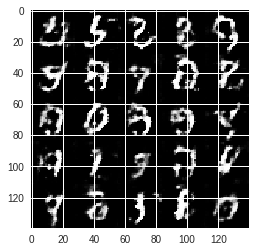

Epoch 1/2... Discriminator Loss: 1.0188... Generator Loss: 0.8261
Epoch 1/2... Discriminator Loss: 1.8603... Generator Loss: 0.3012
Epoch 1/2... Discriminator Loss: 1.0702... Generator Loss: 1.5655
Epoch 1/2... Discriminator Loss: 0.8424... Generator Loss: 0.8882
Epoch 1/2... Discriminator Loss: 1.2632... Generator Loss: 0.5019
Epoch 1/2... Discriminator Loss: 0.6575... Generator Loss: 1.2823
Epoch 1/2... Discriminator Loss: 1.1291... Generator Loss: 3.7206
Epoch 1/2... Discriminator Loss: 0.5886... Generator Loss: 1.8097
Epoch 1/2... Discriminator Loss: 1.2446... Generator Loss: 3.2152
Epoch 1/2... Discriminator Loss: 1.0261... Generator Loss: 0.8092


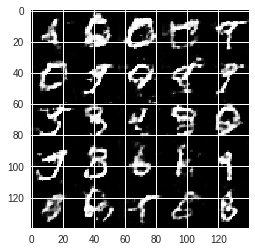

Epoch 1/2... Discriminator Loss: 0.7888... Generator Loss: 1.5619
Epoch 1/2... Discriminator Loss: 1.2029... Generator Loss: 0.5993
Epoch 1/2... Discriminator Loss: 1.1418... Generator Loss: 0.7885
Epoch 1/2... Discriminator Loss: 0.9310... Generator Loss: 1.3664
Epoch 1/2... Discriminator Loss: 0.6681... Generator Loss: 1.3359
Epoch 1/2... Discriminator Loss: 0.7742... Generator Loss: 1.2375
Epoch 2/2... Discriminator Loss: 0.9831... Generator Loss: 0.7213
Epoch 2/2... Discriminator Loss: 1.2073... Generator Loss: 0.6602
Epoch 2/2... Discriminator Loss: 0.7950... Generator Loss: 1.3442
Epoch 2/2... Discriminator Loss: 1.0122... Generator Loss: 0.6690


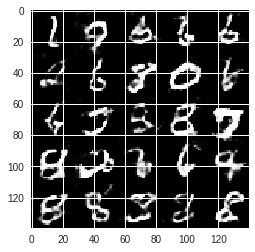

Epoch 2/2... Discriminator Loss: 0.8250... Generator Loss: 1.1966
Epoch 2/2... Discriminator Loss: 0.9424... Generator Loss: 0.8663
Epoch 2/2... Discriminator Loss: 1.3120... Generator Loss: 0.5174
Epoch 2/2... Discriminator Loss: 0.8233... Generator Loss: 2.0923
Epoch 2/2... Discriminator Loss: 0.9897... Generator Loss: 0.6675
Epoch 2/2... Discriminator Loss: 1.5732... Generator Loss: 0.3763
Epoch 2/2... Discriminator Loss: 1.0152... Generator Loss: 0.6891
Epoch 2/2... Discriminator Loss: 1.0322... Generator Loss: 0.7024
Epoch 2/2... Discriminator Loss: 1.0654... Generator Loss: 2.3919
Epoch 2/2... Discriminator Loss: 0.8331... Generator Loss: 0.8439


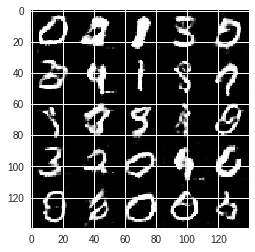

Epoch 2/2... Discriminator Loss: 0.8329... Generator Loss: 1.3665
Epoch 2/2... Discriminator Loss: 3.1066... Generator Loss: 0.1071
Epoch 2/2... Discriminator Loss: 0.7549... Generator Loss: 1.0464
Epoch 2/2... Discriminator Loss: 1.0197... Generator Loss: 0.8471
Epoch 2/2... Discriminator Loss: 0.5433... Generator Loss: 1.9601
Epoch 2/2... Discriminator Loss: 1.8643... Generator Loss: 3.9002
Epoch 2/2... Discriminator Loss: 0.9780... Generator Loss: 0.6996
Epoch 2/2... Discriminator Loss: 1.2639... Generator Loss: 0.6358
Epoch 2/2... Discriminator Loss: 0.6890... Generator Loss: 2.1797
Epoch 2/2... Discriminator Loss: 0.8592... Generator Loss: 1.1764


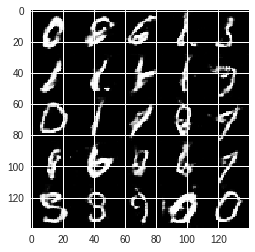

Epoch 2/2... Discriminator Loss: 0.7019... Generator Loss: 1.0943
Epoch 2/2... Discriminator Loss: 1.3470... Generator Loss: 0.4941
Epoch 2/2... Discriminator Loss: 1.2418... Generator Loss: 0.5538
Epoch 2/2... Discriminator Loss: 0.5553... Generator Loss: 2.2139
Epoch 2/2... Discriminator Loss: 0.5362... Generator Loss: 1.7785
Epoch 2/2... Discriminator Loss: 1.1355... Generator Loss: 0.6597
Epoch 2/2... Discriminator Loss: 1.5191... Generator Loss: 0.4248
Epoch 2/2... Discriminator Loss: 1.1546... Generator Loss: 2.5645
Epoch 2/2... Discriminator Loss: 1.1255... Generator Loss: 0.5724
Epoch 2/2... Discriminator Loss: 2.2330... Generator Loss: 0.1864


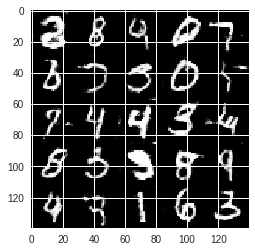

Epoch 2/2... Discriminator Loss: 2.0618... Generator Loss: 0.1972
Epoch 2/2... Discriminator Loss: 0.8220... Generator Loss: 1.3434
Epoch 2/2... Discriminator Loss: 0.6528... Generator Loss: 1.1817
Epoch 2/2... Discriminator Loss: 1.2930... Generator Loss: 2.4911
Epoch 2/2... Discriminator Loss: 0.7092... Generator Loss: 1.1724
Epoch 2/2... Discriminator Loss: 0.8934... Generator Loss: 1.8204
Epoch 2/2... Discriminator Loss: 0.7309... Generator Loss: 1.0277
Epoch 2/2... Discriminator Loss: 3.2120... Generator Loss: 6.3722
Epoch 2/2... Discriminator Loss: 0.6491... Generator Loss: 1.3042
Epoch 2/2... Discriminator Loss: 1.6063... Generator Loss: 0.3113


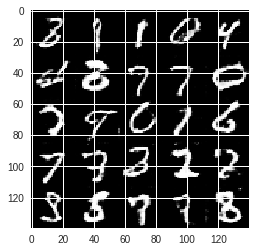

Epoch 2/2... Discriminator Loss: 0.6188... Generator Loss: 1.1188
Epoch 2/2... Discriminator Loss: 0.7793... Generator Loss: 0.9385
Epoch 2/2... Discriminator Loss: 1.3501... Generator Loss: 0.4980


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7207... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 0.5709... Generator Loss: 5.4320
Epoch 1/1... Discriminator Loss: 0.2771... Generator Loss: 2.7266
Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 9.4649
Epoch 1/1... Discriminator Loss: 4.8583... Generator Loss: 8.9803
Epoch 1/1... Discriminator Loss: 0.7785... Generator Loss: 6.8157
Epoch 1/1... Discriminator Loss: 0.1003... Generator Loss: 2.9567
Epoch 1/1... Discriminator Loss: 0.1920... Generator Loss: 6.2049
Epoch 1/1... Discriminator Loss: 0.1522... Generator Loss: 3.1208
Epoch 1/1... Discriminator Loss: 1.8871... Generator Loss: 1.3377


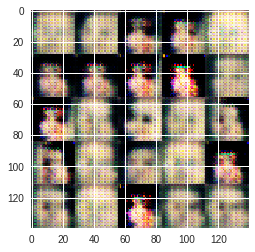

Epoch 1/1... Discriminator Loss: 0.7093... Generator Loss: 1.1084
Epoch 1/1... Discriminator Loss: 2.0411... Generator Loss: 0.9736
Epoch 1/1... Discriminator Loss: 0.3847... Generator Loss: 1.9496
Epoch 1/1... Discriminator Loss: 1.2415... Generator Loss: 2.1913
Epoch 1/1... Discriminator Loss: 1.6426... Generator Loss: 0.3937
Epoch 1/1... Discriminator Loss: 1.6655... Generator Loss: 0.4184
Epoch 1/1... Discriminator Loss: 2.1695... Generator Loss: 3.6564
Epoch 1/1... Discriminator Loss: 0.8582... Generator Loss: 1.1908
Epoch 1/1... Discriminator Loss: 0.5630... Generator Loss: 1.3628
Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 1.3111


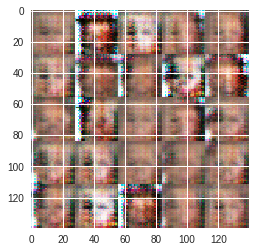

Epoch 1/1... Discriminator Loss: 2.9205... Generator Loss: 2.6418
Epoch 1/1... Discriminator Loss: 0.8001... Generator Loss: 1.2260
Epoch 1/1... Discriminator Loss: 1.0627... Generator Loss: 0.9130
Epoch 1/1... Discriminator Loss: 1.0111... Generator Loss: 0.9879
Epoch 1/1... Discriminator Loss: 1.0180... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 1.5892
Epoch 1/1... Discriminator Loss: 1.2331... Generator Loss: 0.5851
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 0.8161... Generator Loss: 1.2653
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.9711


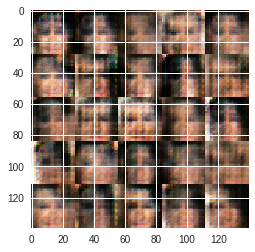

Epoch 1/1... Discriminator Loss: 0.8381... Generator Loss: 1.2645
Epoch 1/1... Discriminator Loss: 1.4368... Generator Loss: 0.8152
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.9265
Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 0.7567
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.5709... Generator Loss: 0.4331
Epoch 1/1... Discriminator Loss: 1.2338... Generator Loss: 0.7559
Epoch 1/1... Discriminator Loss: 1.0488... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 0.4384
Epoch 1/1... Discriminator Loss: 0.9035... Generator Loss: 0.8573


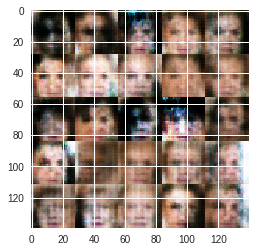

Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 1.3495
Epoch 1/1... Discriminator Loss: 1.2526... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 0.7528... Generator Loss: 1.4420
Epoch 1/1... Discriminator Loss: 1.1556... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 1.0895
Epoch 1/1... Discriminator Loss: 1.6332... Generator Loss: 1.6000
Epoch 1/1... Discriminator Loss: 1.2020... Generator Loss: 1.7999
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 2.6634
Epoch 1/1... Discriminator Loss: 1.1790... Generator Loss: 0.6601
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.5280


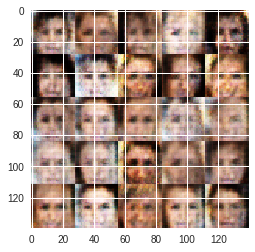

Epoch 1/1... Discriminator Loss: 1.0905... Generator Loss: 1.5889
Epoch 1/1... Discriminator Loss: 1.7473... Generator Loss: 2.2862
Epoch 1/1... Discriminator Loss: 1.0322... Generator Loss: 0.7084
Epoch 1/1... Discriminator Loss: 2.5236... Generator Loss: 3.7700
Epoch 1/1... Discriminator Loss: 0.8440... Generator Loss: 1.4683
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.8027
Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.5250
Epoch 1/1... Discriminator Loss: 1.2198... Generator Loss: 1.1963
Epoch 1/1... Discriminator Loss: 1.5735... Generator Loss: 0.3894
Epoch 1/1... Discriminator Loss: 1.2556... Generator Loss: 1.4722


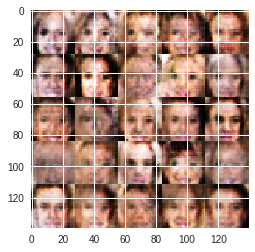

Epoch 1/1... Discriminator Loss: 0.9048... Generator Loss: 1.2320
Epoch 1/1... Discriminator Loss: 0.9076... Generator Loss: 0.9905
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 0.4762
Epoch 1/1... Discriminator Loss: 1.2471... Generator Loss: 0.5779
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 1.0659
Epoch 1/1... Discriminator Loss: 1.1573... Generator Loss: 1.9705
Epoch 1/1... Discriminator Loss: 0.9923... Generator Loss: 0.9702
Epoch 1/1... Discriminator Loss: 1.1785... Generator Loss: 0.6863
Epoch 1/1... Discriminator Loss: 0.8583... Generator Loss: 1.0880
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 1.3367


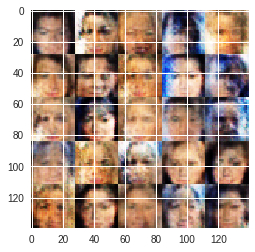

Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 0.7240
Epoch 1/1... Discriminator Loss: 1.2582... Generator Loss: 1.0939
Epoch 1/1... Discriminator Loss: 1.3774... Generator Loss: 1.8374
Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 1.3110
Epoch 1/1... Discriminator Loss: 0.9749... Generator Loss: 0.8674
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 0.8000
Epoch 1/1... Discriminator Loss: 0.9763... Generator Loss: 1.0466
Epoch 1/1... Discriminator Loss: 1.5357... Generator Loss: 0.4064
Epoch 1/1... Discriminator Loss: 0.9784... Generator Loss: 1.0104


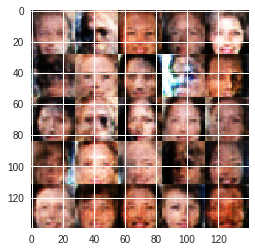

Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 0.8344... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.4930
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 0.6355
Epoch 1/1... Discriminator Loss: 0.9932... Generator Loss: 1.0995
Epoch 1/1... Discriminator Loss: 0.9936... Generator Loss: 1.4105
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 0.6855
Epoch 1/1... Discriminator Loss: 1.1950... Generator Loss: 1.7798
Epoch 1/1... Discriminator Loss: 1.4454... Generator Loss: 1.2963
Epoch 1/1... Discriminator Loss: 0.8704... Generator Loss: 0.9195


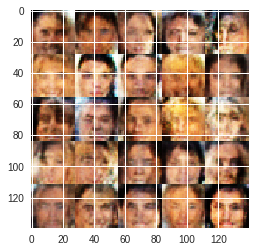

Epoch 1/1... Discriminator Loss: 0.9633... Generator Loss: 0.9615
Epoch 1/1... Discriminator Loss: 0.9518... Generator Loss: 1.2360
Epoch 1/1... Discriminator Loss: 1.2780... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.5222
Epoch 1/1... Discriminator Loss: 1.0017... Generator Loss: 0.9689
Epoch 1/1... Discriminator Loss: 1.0001... Generator Loss: 1.4762
Epoch 1/1... Discriminator Loss: 1.0493... Generator Loss: 0.8498
Epoch 1/1... Discriminator Loss: 0.9312... Generator Loss: 1.2193
Epoch 1/1... Discriminator Loss: 1.0891... Generator Loss: 1.0599
Epoch 1/1... Discriminator Loss: 1.5757... Generator Loss: 2.2192


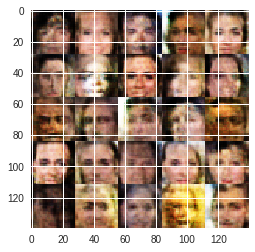

Epoch 1/1... Discriminator Loss: 1.2018... Generator Loss: 0.7352
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 0.3876
Epoch 1/1... Discriminator Loss: 1.1480... Generator Loss: 1.1185
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.0670... Generator Loss: 1.2514
Epoch 1/1... Discriminator Loss: 1.1725... Generator Loss: 1.1392
Epoch 1/1... Discriminator Loss: 1.1203... Generator Loss: 1.0034
Epoch 1/1... Discriminator Loss: 1.3397... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.0202... Generator Loss: 1.0265
Epoch 1/1... Discriminator Loss: 1.6393... Generator Loss: 2.1152


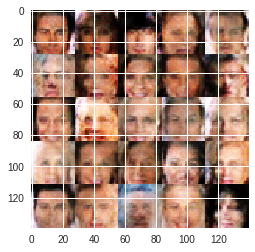

Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 1.1250
Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 1.3771
Epoch 1/1... Discriminator Loss: 1.0231... Generator Loss: 1.2093
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.4562
Epoch 1/1... Discriminator Loss: 0.8990... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 0.6383
Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 1.2828
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.8886
Epoch 1/1... Discriminator Loss: 1.0298... Generator Loss: 0.8244


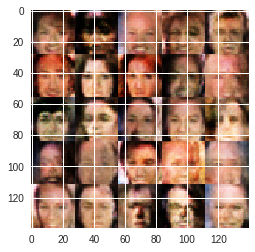

Epoch 1/1... Discriminator Loss: 1.2987... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 1.0798... Generator Loss: 1.5056
Epoch 1/1... Discriminator Loss: 1.2207... Generator Loss: 1.8739
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.5056
Epoch 1/1... Discriminator Loss: 1.3465... Generator Loss: 0.5721
Epoch 1/1... Discriminator Loss: 1.3126... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.0952... Generator Loss: 0.8363
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 1.0802
Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.4297
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 0.9954


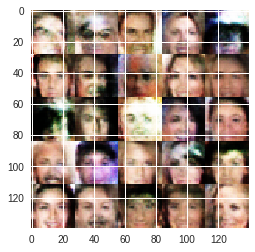

Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 1.3448
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 0.4765
Epoch 1/1... Discriminator Loss: 1.5978... Generator Loss: 0.3401
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.8982
Epoch 1/1... Discriminator Loss: 0.8977... Generator Loss: 1.0234
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 1.5998
Epoch 1/1... Discriminator Loss: 0.8901... Generator Loss: 0.9510
Epoch 1/1... Discriminator Loss: 1.1202... Generator Loss: 0.9732
Epoch 1/1... Discriminator Loss: 0.9179... Generator Loss: 1.1009
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 1.0474


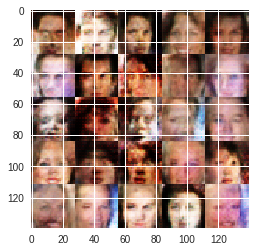

Epoch 1/1... Discriminator Loss: 1.0200... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 0.9826... Generator Loss: 1.2870
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.4788
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.4532
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 1.0940
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.5930
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 0.8350... Generator Loss: 1.4110
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 1.3964


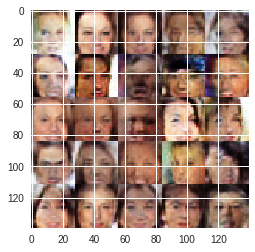

Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.7470
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.5296
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.4059
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 1.1388... Generator Loss: 0.8238
Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 0.9891... Generator Loss: 1.0421


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.